In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns

data=pd.read_csv("C:\\Users\\moksh\\OneDrive\\Desktop\\titanic.csv")
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X = data[['Age', 'Sex', 'Fare', 'Pclass']]
y = data['Survived']
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})



X = (X - X.mean(axis=0)) / X.std(axis=0)

# Adding a column of ones to X (bias term)
X.insert(0, 'Ones', 1)


C:\Users\moksh\AppData\Local\Temp\ipykernel_17356\3086170572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


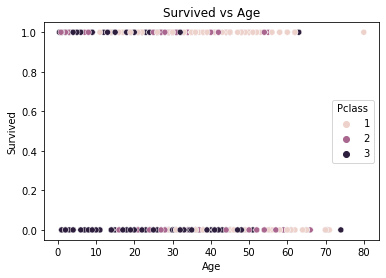

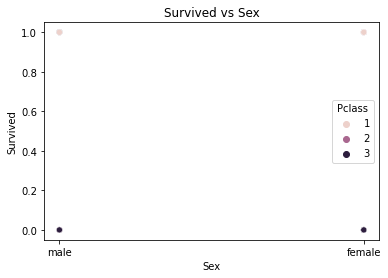

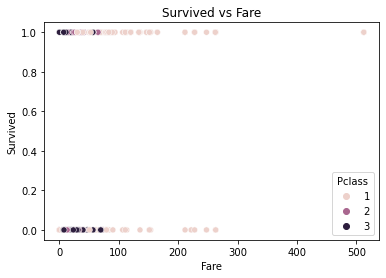

In [17]:
exclude_columns = ['Survived', 'Pclass']

# Iterate through each column in the dataset
for column in ['Age', 'Sex', 'Fare', 'Pclass']:
    # If the current column is not in the 'exclude_columns' list, create a scatter plot
    if column not in exclude_columns:
        # Create a scatter plot using seaborn
        sns.scatterplot(data=data, x=column, y='Survived', hue='Pclass')
        
        # Add a title to the plot
        plt.title('Survived vs {}'.format(column))
        
        # Display the plot
        plt.show()

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (alpha / m) * np.dot(X.T, (sigmoid(np.dot(X, theta)) - y))
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [12]:
theta = np.zeros(X.shape[1])
alpha = 0.001
iterations = 2000

X = np.array(X.values)
y = np.array(y.values)

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)



# Making predictions on the test set
pred = [1 if p > 0.5 else 0 for p in sigmoid(np.dot(X, theta))]


# Printing the accuracy of the model
print("Accuracy: ", accuracy_score(y, pred) * 100)

# Confusion Matrix
print("Confusion Matrix: ", confusion_matrix(y, pred))


Accuracy:  61.61616161616161
Confusion Matrix:  [[549   0]
 [342   0]]
